In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from adjustText import adjust_text
import omniplot.plot as op

<H5> This dataset is about data that have been combined that showcases the sales of different drinks 
purchased by customers from different states between 2020 and 2023.

In [4]:
df = pd.read_csv('D:/Data/soft_drink_sales.csv', sep = ',')

In [5]:
df

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID
0,Coffee,Coca-Cola,Coffee,151,2141,4956,-2815,2020-07-04,Angela Wilson,California,East Danielleview,35273,1-143-51064-X
1,Coffee,Coca-Cola,Coffee,624,1620,1156,464,2021-04-09,Zachary Wheeler,Wisconsin,New Kimberlyshire,55509,1-163-25655-2
2,Wine,Coca-Cola,Alcoholic,853,9978,1030,8948,2022-03-10,Jeremy Arroyo,Massachusetts,Vickieshire,93236,0-345-30366-0
3,Green Tea,Dr. Pepper,Tea,962,5974,5279,695,2023-05-10,Andrew Fleming,Arizona,Albertberg,34895,1-4844-8219-0
4,Vodka,Dr. Pepper,Alcoholic,719,3928,2828,1100,2020-11-19,Caroline Smith,Indiana,Johnsonstad,90201,1-85816-387-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Wine,Dr. Pepper,Alcoholic,337,6676,1932,4744,2020-02-15,Kyle Morris,New Mexico,Heatherbury,80789,0-7733-9949-6
9996,Green Tea,Coca-Cola,Tea,745,1096,1603,-507,2023-02-02,Jacqueline Mendez,Tennessee,South Charles,42497,0-13-801494-9
9997,Energy Drink,Pepsi,Soft Drink,728,4703,5135,-432,2020-01-14,Taylor Robinson,Virginia,West Susanchester,13202,1-893420-14-0
9998,Cola,Coca-Cola,Soft Drink,142,3655,6436,-2781,2022-10-28,Sierra Morrison,Montana,Perezfort,66758,1-5413-2685-7


# Data Cleansing

In [9]:
df.sample()

,Product,Company,Category,Units Sold,Revenue,Cost of Goods Sold,Profit,Purchase Date,Customer Name,Customer State,Customer City,Customer Zip Code,Order ID
8575,Herbal Tea,Coca-Cola,Tea,537,4247,6205,-1958,2022-03-23,Maria Sanchez,New York,Amyton,19701,1-343-01528-6


In [11]:
df.shape

(10000, 13)

In [13]:
df.count()

Product               10000
Company               10000
Category              10000
Units Sold            10000
Revenue               10000
Cost of Goods Sold    10000
Profit                10000
Purchase Date         10000
Customer Name         10000
Customer State        10000
Customer City         10000
Customer Zip Code     10000
Order ID              10000
dtype: int64

In [15]:
df.isna().sum()

Product               0
Company               0
Category              0
Units Sold            0
Revenue               0
Cost of Goods Sold    0
Profit                0
Purchase Date         0
Customer Name         0
Customer State        0
Customer City         0
Customer Zip Code     0
Order ID              0
dtype: int64

In [17]:
df[df == 0].sum()

Product                 0
Company                 0
Category                0
Units Sold            0.0
Revenue               0.0
Cost of Goods Sold    0.0
Profit                0.0
Purchase Date           0
Customer Name           0
Customer State          0
Customer City           0
Customer Zip Code     0.0
Order ID                0
dtype: object

In [19]:
df[df.duplicated].sum()

Product               0.0
Company               0.0
Category              0.0
Units Sold            0.0
Revenue               0.0
Cost of Goods Sold    0.0
Profit                0.0
Purchase Date         0.0
Customer Name         0.0
Customer State        0.0
Customer City         0.0
Customer Zip Code     0.0
Order ID              0.0
dtype: float64

In [21]:
df.nunique()

Product                  10
Company                   3
Category                  4
Units Sold              901
Revenue                6042
Cost of Goods Sold     5495
Profit                 6956
Purchase Date          1306
Customer Name          9335
Customer State           50
Customer City          7769
Customer Zip Code      8789
Order ID              10000
dtype: int64

In [23]:
df.describe()

,Units Sold,Revenue,Cost of Goods Sold,Profit,Customer Zip Code
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,547.162400,5507.824100,4244.766500,1263.057600,50240.881500
std,260.392451,2591.286638,2158.872391,3344.636747,30165.679293
min,100.000000,1000.000000,500.000000,-6961.000000,1008.000000
25%,323.000000,3283.250000,2380.500000,-1177.250000,24303.250000
50%,541.000000,5517.000000,4268.000000,1243.500000,50993.000000
75%,772.250000,7757.500000,6095.000000,3659.000000,77537.750000
max,1000.000000,9999.000000,8000.000000,9461.000000,99950.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             10000 non-null  object
 1   Company             10000 non-null  object
 2   Category            10000 non-null  object
 3   Units Sold          10000 non-null  int64 
 4   Revenue             10000 non-null  int64 
 5   Cost of Goods Sold  10000 non-null  int64 
 6   Profit              10000 non-null  int64 
 7   Purchase Date       10000 non-null  object
 8   Customer Name       10000 non-null  object
 9   Customer State      10000 non-null  object
 10  Customer City       10000 non-null  object
 11  Customer Zip Code   10000 non-null  int64 
 12  Order ID            10000 non-null  object
dtypes: int64(5), object(8)
memory usage: 1015.8+ KB


<H5>

# Exploratory Data analysis

<H4> Below are the questions i am going to cover based on the given data.



<H5> 1 What is the sales trend by each month ?

<H5> 2 What is the sales change by each month ?

<H5> 3 What are the top ten products by sales ?

<H5> 4 What are the top ten products by quantity ?

<H5> 5 What are the most prefered products ?




 <H3> Net Sales trend analysis by each month

In [31]:
df['Purchase Date'].min()

'2020-01-01'

In [33]:
df['Purchase Date'].max()

'2023-07-29'

In [35]:
# getting the Year Month from the data set
df['Year_Month'] = pd.to_datetime(df['Purchase Date']).dt.strftime('%Y-%m')

In [37]:
# grouping the data by the year month
df_trend = df.groupby('Year_Month')['Revenue'].sum().reset_index()

In [39]:
# sample of the new data frame
df_trend.head(5)

,Year_Month,Revenue
0,2020-01,1411867
1,2020-02,1323070
2,2020-03,1348547
3,2020-04,1120703
4,2020-05,1208480


C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_52124\3813622713.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_yticklabels([format(y) for y in line.get_yticks()])
C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_52124\3813622713.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  line.set_xticklabels(line.get_xticklabels(), rotation = 90, ha = 'center')


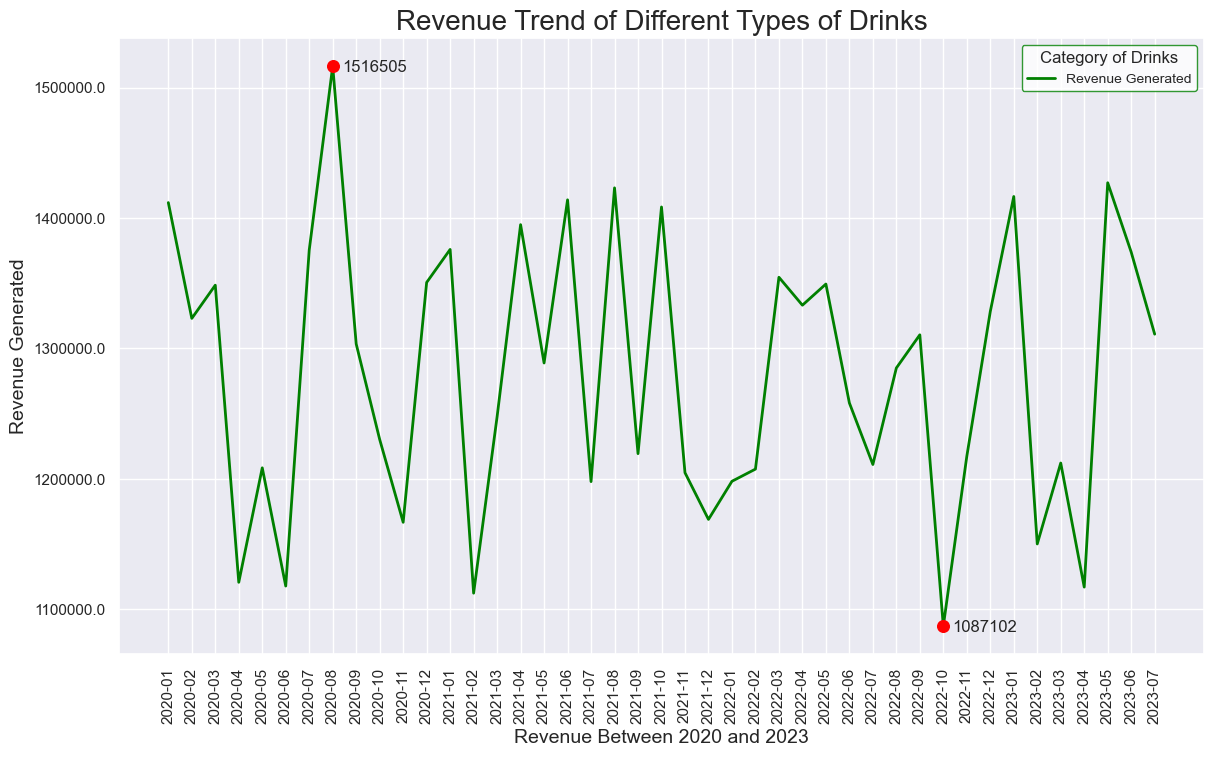

In [41]:
# showing the Net Sales trend of all the types of drinks between 2020 and 2023
sns.set(rc = {'figure.figsize':(14, 8)})
line = sns.lineplot(x = 'Year_Month', y = 'Revenue', data = df_trend, linestyle = 'solid', linewidth = 2, color = 'green')
max_value = round(df_trend['Revenue'].max(), 1)
min_value = round(df_trend['Revenue'].min(), 1)
plt.scatter(df_trend['Year_Month'][df_trend['Revenue'].idxmax()], max_value, color = 'red', s = 70, zorder = 3)
plt.scatter(df_trend['Year_Month'][df_trend['Revenue'].idxmin()], min_value, color = 'red', s = 70, zorder = 3)
plt.annotate(str(max_value), (df_trend['Year_Month'][df_trend['Revenue'].idxmax()], max_value),
            textcoords = 'offset points', xytext = (30, -4), ha = 'center') 
plt.annotate(str(min_value), (df_trend['Year_Month'][df_trend['Revenue'].idxmin()], min_value),
             textcoords = 'offset points', xytext = (30, -4), ha = 'center')
line.set_yticklabels([format(y) for y in line.get_yticks()])
line.set_xticklabels(line.get_xticklabels(), rotation = 90, ha = 'center')
plt.title('Revenue Trend of Different Types of Drinks', fontsize = 20)
plt.xlabel('Revenue Between 2020 and 2023', fontsize = 14)
plt.ylabel('Revenue Generated', fontsize = 14)
line.legend(title = 'Category of Drinks', labels = ['Revenue Generated'], loc = 'upper right', fontsize = 10, 
            edgecolor = 'green', facecolor = 'white')
plt.show()

<H4>  This graph is about the sales trend of different products of drinks, which showcases sales that have been made between 2020 and 2023. in 2020-06 
there was a massive increase in sales until 2020-08 which is the highest period where sales have been generated. in 2022-10 there was a massive drop in sales.

<H4> From the conclusion that i have drawn, the massive increase in sales shows that there was a succesfull increase in prices of products and the cost of sales were growing at a slower pace, and the massive decrease in sales shows that the demand of the products was weak and the companies had to discount its products in order to move them

<H3> The sales change by each month

In [46]:
# getting the year month from the data set
df['year month'] = pd.to_datetime(df['Purchase Date']).dt.strftime('%Y-%m')

In [48]:
# grouping the data by the year month
df_salesChange = df.groupby('year month')['Revenue'].sum().reset_index()

In [50]:
# computing the sales change by each month
df_salesChange['Sales Percent Change'] = round(df_salesChange['Revenue'].pct_change(periods = 1) * 100, 1)

In [52]:
df_salesChange

,year month,Revenue,Sales Percent Change
0,2020-01,1411867,NaN
1,2020-02,1323070,-6.3
2,2020-03,1348547,1.9
3,2020-04,1120703,-16.9
4,2020-05,1208480,7.8
5,2020-06,1117830,-7.5
6,2020-07,1375481,23.0
7,2020-08,1516505,10.3
8,2020-09,1303498,-14.0
9,2020-10,1230252,-5.6


<H4> above is a dataset that display a sales percent change by each month from 2020 to 2023.


<H4> From the conclusion that i have drawn from the dataset above, in 2021-01 there was a massive drop of -9.2 in sales which also mean a decrease in revenue generated by the companies in this period, having a low sales change may help companies to identify areas for improvement. In 2023-05 there was a massive increase of 27.8 in sales which also means that the revenue performance was increasing.



<H3> The top ten products by Sales

In [56]:
# grouping the data by products
df_products = pd.DataFrame(df.groupby('Product')['Revenue'].sum())

In [58]:
df_sortedProducts = df_products.sort_values('Revenue', ascending = False)

In [60]:
df_sortedProducts[:10]

,Revenue
Product,
Herbal Tea,5765332
Wine,5691052
Vodka,5625536
Green Tea,5561211
Coffee,5557975
Cola,5511882
Beer,5502107
Energy Drink,5371177
Lemonade,5339817


<H4> my conclusion from the dataset, theres an increase demand for low-alcohol beverages because of the growing health consciousness and people are transitioning towards non-alcohol and healthy drinks.



<H3> The top ten products by quantity

In [64]:
# we are grouping the data by products
df_quantity = pd.DataFrame(df.groupby('Product')['Units Sold'].sum())

In [66]:
df_productByQuantity = df_quantity.sort_values('Units Sold', ascending = False)

In [68]:
df_productByQuantity

,Units Sold
Product,
Green Tea,569303
Herbal Tea,565519
Wine,561817
Coffee,550962
Cola,548239
Lemonade,547903
Beer,543806
Energy Drink,538676
Vodka,537217


<H4> The data frame above showcases the units sold of products, the high units sold indicates an increased market demand for the products or the success of existing marketing strategy and the lower units sold indicates a decrease market in demand for the products which can be caused by an increased in competition or other factors

<H4> 

<H3> The most Prefered products

C:\Users\FarranceMM\AppData\Local\Temp\ipykernel_52124\1470376672.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  bars.set_yticklabels(['{:.0f}'.format(y) for y in bars.get_yticks()])


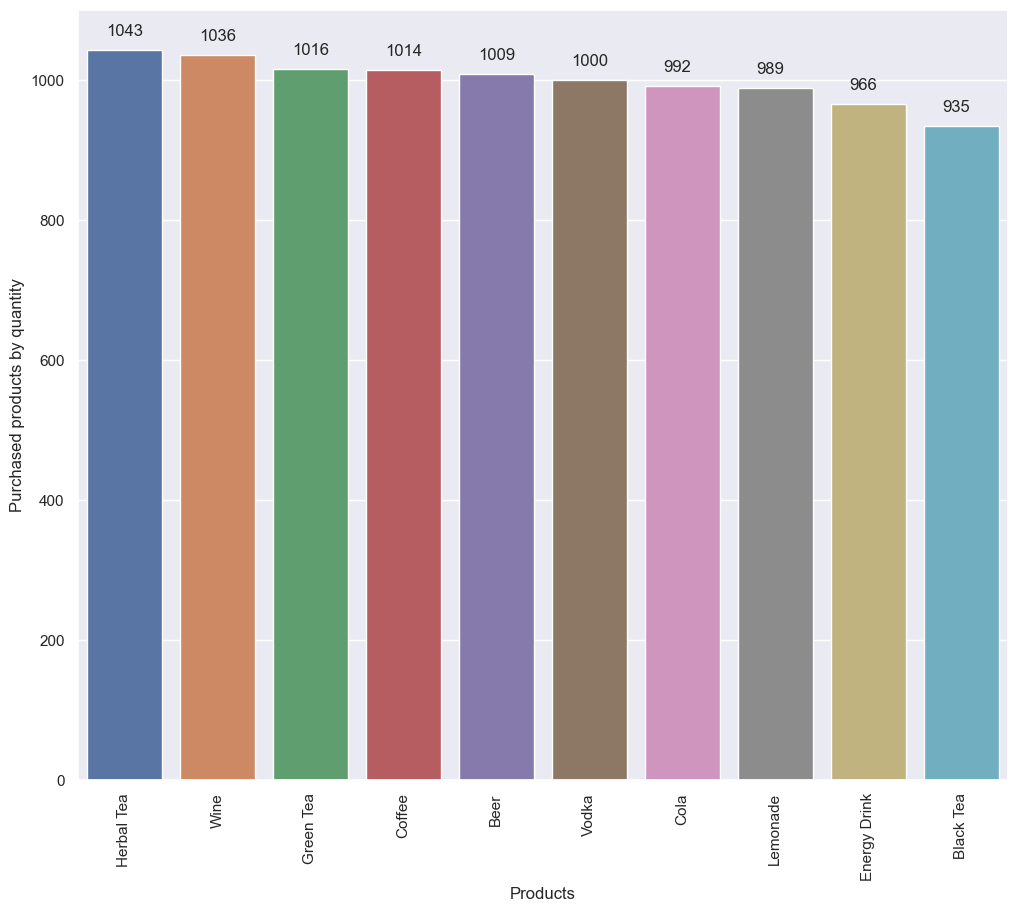

In [73]:
""" We are going to plot the graph using Countplot from the seaborn package which produce the results by counting how many times does a product appears
based on the customers preference """
plt.figure(figsize = (12, 10))
total = len(df)
bars = sns.countplot(data = df, x = 'Product', order = df['Product'].value_counts().index)
for p in bars.patches:
    bars.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 20))
bars.set(ylim = (0, 1100))
bars.set_yticklabels(['{:.0f}'.format(y) for y in bars.get_yticks()])
bars.set_xticklabels(bars.get_xticklabels(), rotation = 90, ha = 'center')
plt.ylabel('Purchased products by quantity')
plt.xlabel('Products')
plt.show()

<H4> The graph above showcases the most prefered products by customers, where Herbal Tea is the product with 1043 number of customers which is the highest and the Black Tea with 935 number of customers which is the lowest.

<H4> When i draw my conclusion based on the structure of the graph, most consumers are benefit seeking consumers they buy because of the effects of the product, these are transformation seekers hoping to reduce weight or gain other benefits.